In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [135]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import cross_val_predict

from sklearn.metrics import confusion_matrix,precision_score,recall_score,precision_recall_curve
from sklearn import metrics


In [14]:
# Let's load the data

df=pd.read_csv("People_Charm_Case.csv")

In [15]:
df.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low


In [16]:
# lets look at data types

df.dtypes

satisfactoryLevel        float64
lastEvaluation           float64
numberOfProjects           int64
avgMonthlyHours            int64
timeSpent.company          int64
workAccident               int64
left                       int64
promotionInLast5years      int64
dept                      object
salary                    object
dtype: object

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfactoryLevel        14999 non-null float64
lastEvaluation           14999 non-null float64
numberOfProjects         14999 non-null int64
avgMonthlyHours          14999 non-null int64
timeSpent.company        14999 non-null int64
workAccident             14999 non-null int64
left                     14999 non-null int64
promotionInLast5years    14999 non-null int64
dept                     14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


#### Thanks to the people who collectecd the data , there are no null values 

In [18]:
# Let's check for any duplicated records 

len(df[df.duplicated()])

3008

### My god there are 3008 duplicate records in the data so we need to eliminate these to avoid overfitting

In [19]:
df.drop(df[df.duplicated()].index,axis=0,inplace=True)

In [20]:
len(df[df.duplicated()])

0

In [21]:
df.corr()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years
satisfactoryLevel,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,-0.350558,0.019789
lastEvaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,0.013520,-0.007206
numberOfProjects,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544
avgMonthlyHours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964
timeSpent.company,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828
workAccident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852
left,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657
promotionInLast5years,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000


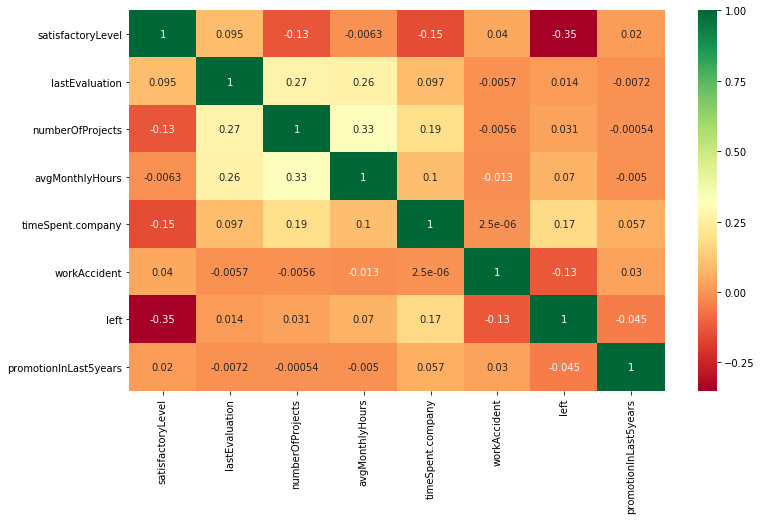

In [22]:
corr=df.corr()
plt.figure(figsize=(12,7))

sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot=True,cmap='RdYlGn')

# EDA

### Satisfaction Vs Leaving Job

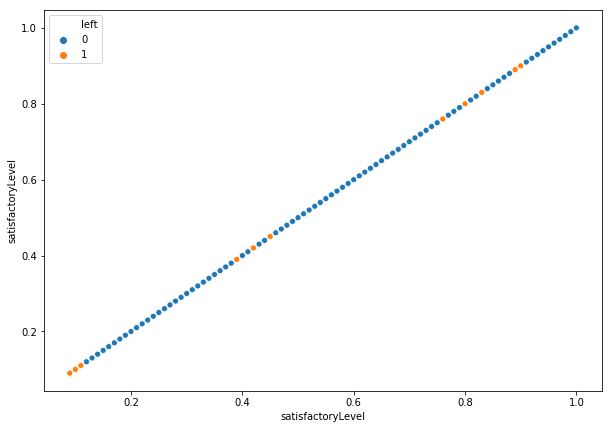

In [29]:
plt.figure(figsize=(10,7))

sns.scatterplot(data=df,x='satisfactoryLevel',y='satisfactoryLevel',hue='left')

##### satisfactory Level who didn't left the job 

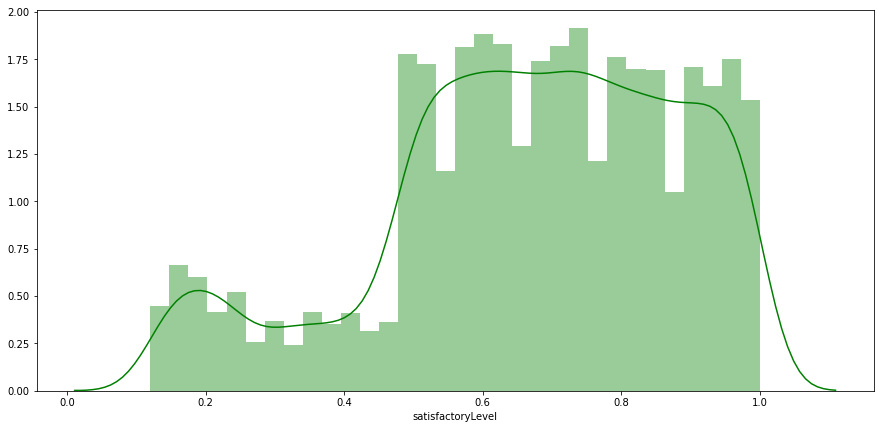

In [35]:
plt.figure(figsize=(15,7))

sns.distplot(df[df['left']==0]['satisfactoryLevel'],color='Green')

##### satisfactory Level who left the company

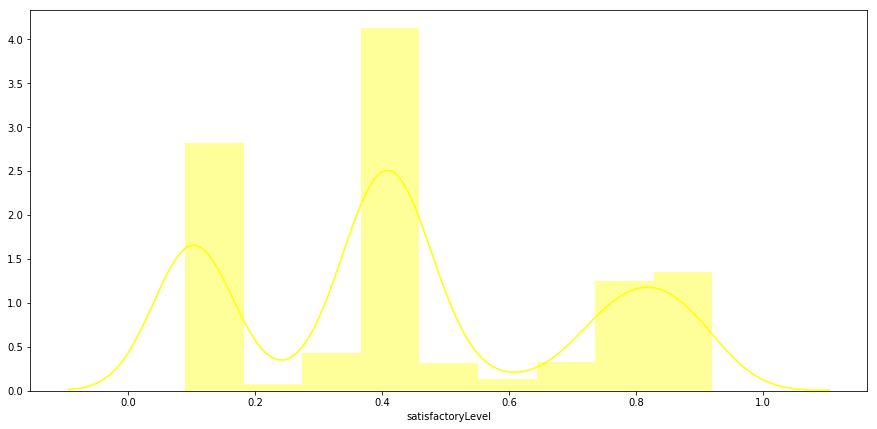

In [36]:
plt.figure(figsize=(15,7))

sns.distplot(df[df['left']==1]['satisfactoryLevel'],color='yellow')

#### We can observe that more no of high satisfactory people are not leaving when compared to less satisfactory people

## LastEvaluation Vs Leaving Job

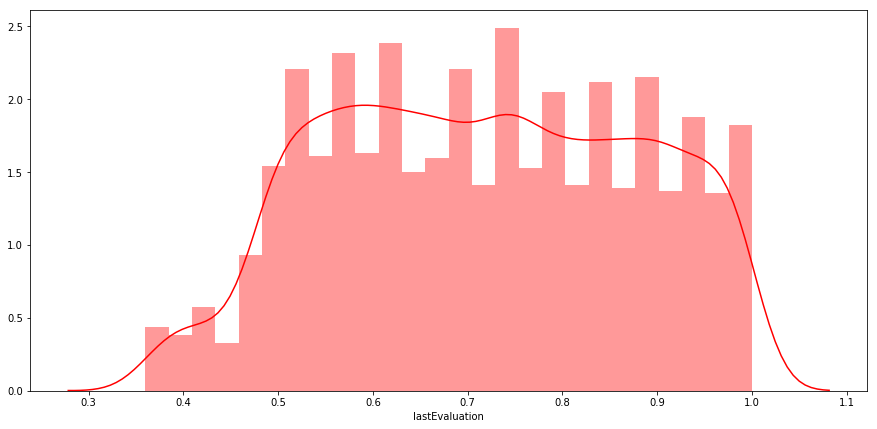

In [38]:
# LastEvalution for people who didn't left the company 

plt.figure(figsize=(15,7))

sns.distplot(df[df['left']==0]['lastEvaluation'],color='red')

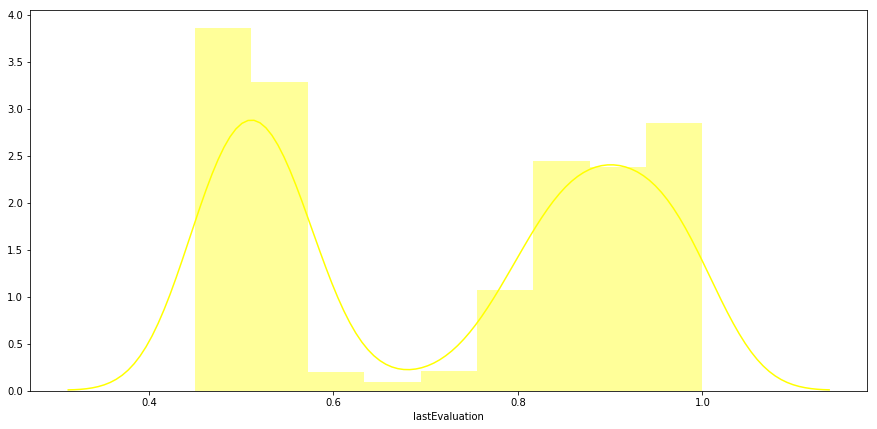

In [39]:
# LastEvalution for people who left the company 

plt.figure(figsize=(15,7))

sns.distplot(df[df['left']==1]['lastEvaluation'],color='yellow')

#### this is evenly distributed so last evaluation not much significant for prediction of weather a perticular employees leaves the job or not

## Number of Projects  VS  Leaving Job

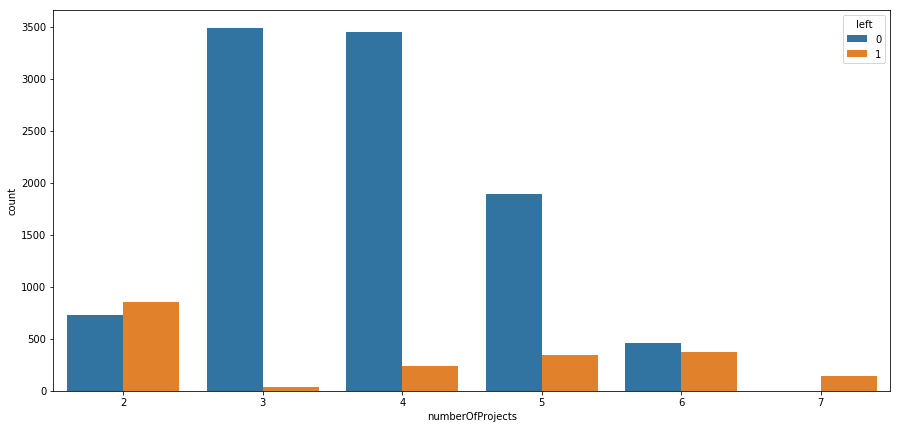

In [55]:
# LastEvalution for people

plt.figure(figsize=(15,7))

sns.countplot(df['numberOfProjects'],hue=df['left'])

### we are not finding much relation with no of projects vs leaving job

## Average Monthly Hours VS Leaving the Job

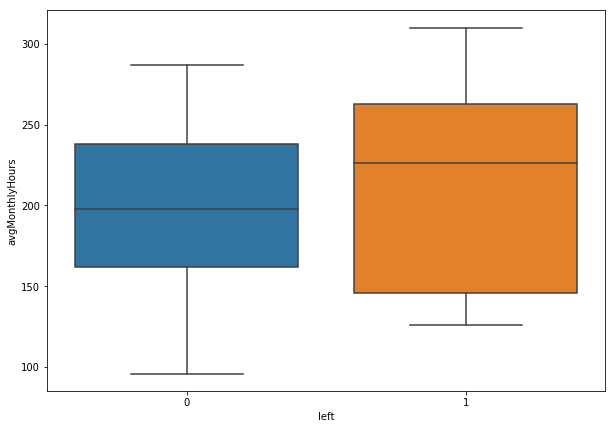

In [63]:
# LastEvalution for people

plt.figure(figsize=(10,7))

sns.boxplot(data=df,x='left',y='avgMonthlyHours')

##### From the above figure we can say that there is no much relation between average monthly hours and leaving the job

## TimeSpent in Company VS Leaving Job

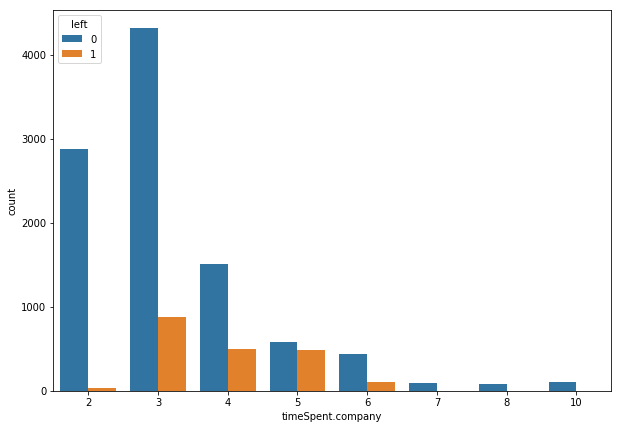

In [67]:
plt.figure(figsize=(10,7))
sns.countplot(df['timeSpent.company'],hue=df['left'])

##### From the above figure , we can say that people with < 2years or >7 years are not leaving much compared to other years , here also we are not getting much relation 

## Work Accident VS Leaving Job

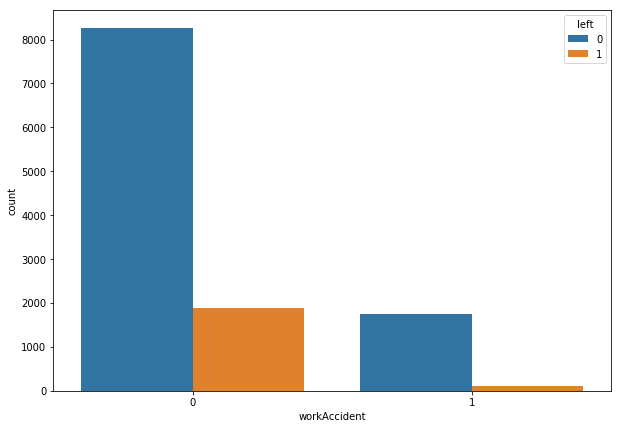

In [68]:
plt.figure(figsize=(10,7))

sns.countplot(df['workAccident'],hue=df['left'])

In [69]:
# No much relation here

## Promotion VS Leaving the Job

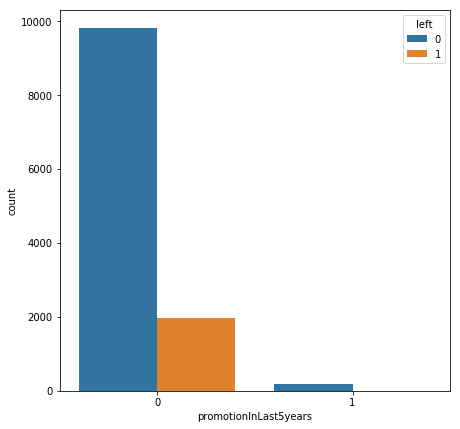

In [70]:
plt.figure(figsize=(7,7))

sns.countplot(df['promotionInLast5years'],hue=df['left'])

##### Here we got some relation , people with promotion in the last 5 years are less likely to leave the compnay than the others

## Department vs Leaving Job

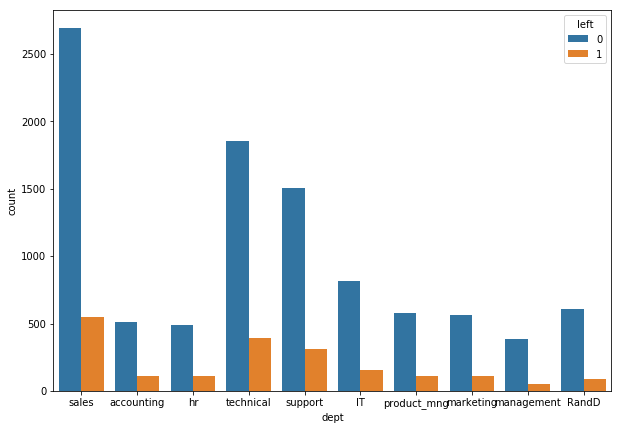

In [72]:
plt.figure(figsize=(10,7))

sns.countplot(df['dept'],hue=df['left'])

No much relation with Department people are working 

## Salary Vs Leaving Job

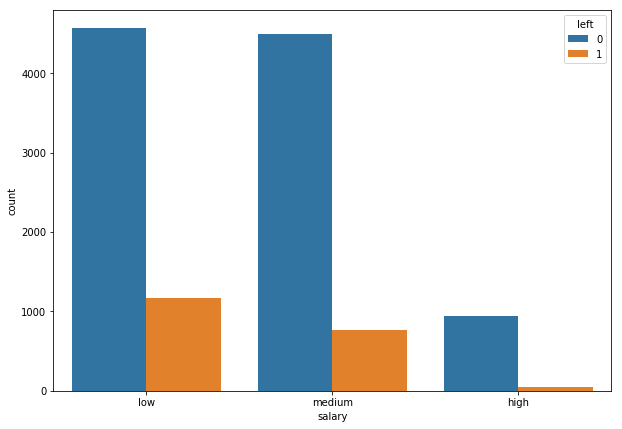

In [73]:
plt.figure(figsize=(10,7))

sns.countplot(df['salary'],hue=df['left'])

##### People are leaving the company irrespective of salary 

In [74]:
df.isnull().sum()

satisfactoryLevel        0
lastEvaluation           0
numberOfProjects         0
avgMonthlyHours          0
timeSpent.company        0
workAccident             0
left                     0
promotionInLast5years    0
dept                     0
salary                   0
dtype: int64

### There are no null values in the dataset

### Converting Categorical data to numerical 

In [75]:
df=pd.get_dummies(df)

In [76]:
df.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept_IT,dept_RandD,...,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.41,0.50,2,153,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [91]:
df.dtypes

satisfactoryLevel        float64
lastEvaluation           float64
numberOfProjects           int64
avgMonthlyHours            int64
timeSpent.company          int64
workAccident               int64
left                       int64
promotionInLast5years      int64
dept_IT                    uint8
dept_RandD                 uint8
dept_accounting            uint8
dept_hr                    uint8
dept_management            uint8
dept_marketing             uint8
dept_product_mng           uint8
dept_sales                 uint8
dept_support               uint8
dept_technical             uint8
salary_high                uint8
salary_low                 uint8
salary_medium              uint8
dtype: object

In [79]:
# Skewness of the data 

df.skew()

satisfactoryLevel       -0.538702
lastEvaluation          -0.031686
numberOfProjects         0.332152
avgMonthlyHours          0.027208
timeSpent.company        1.816577
workAccident             1.914410
left                     1.795135
promotionInLast5years    7.490008
dept_IT                  3.062158
dept_RandD               3.787231
dept_accounting          4.045725
dept_hr                  4.124169
dept_management          4.954409
dept_marketing           3.857515
dept_product_mng         3.813648
dept_sales               1.035579
dept_support             1.940320
dept_technical           1.604510
salary_high              3.033878
salary_low               0.085319
salary_medium            0.246908
dtype: float64

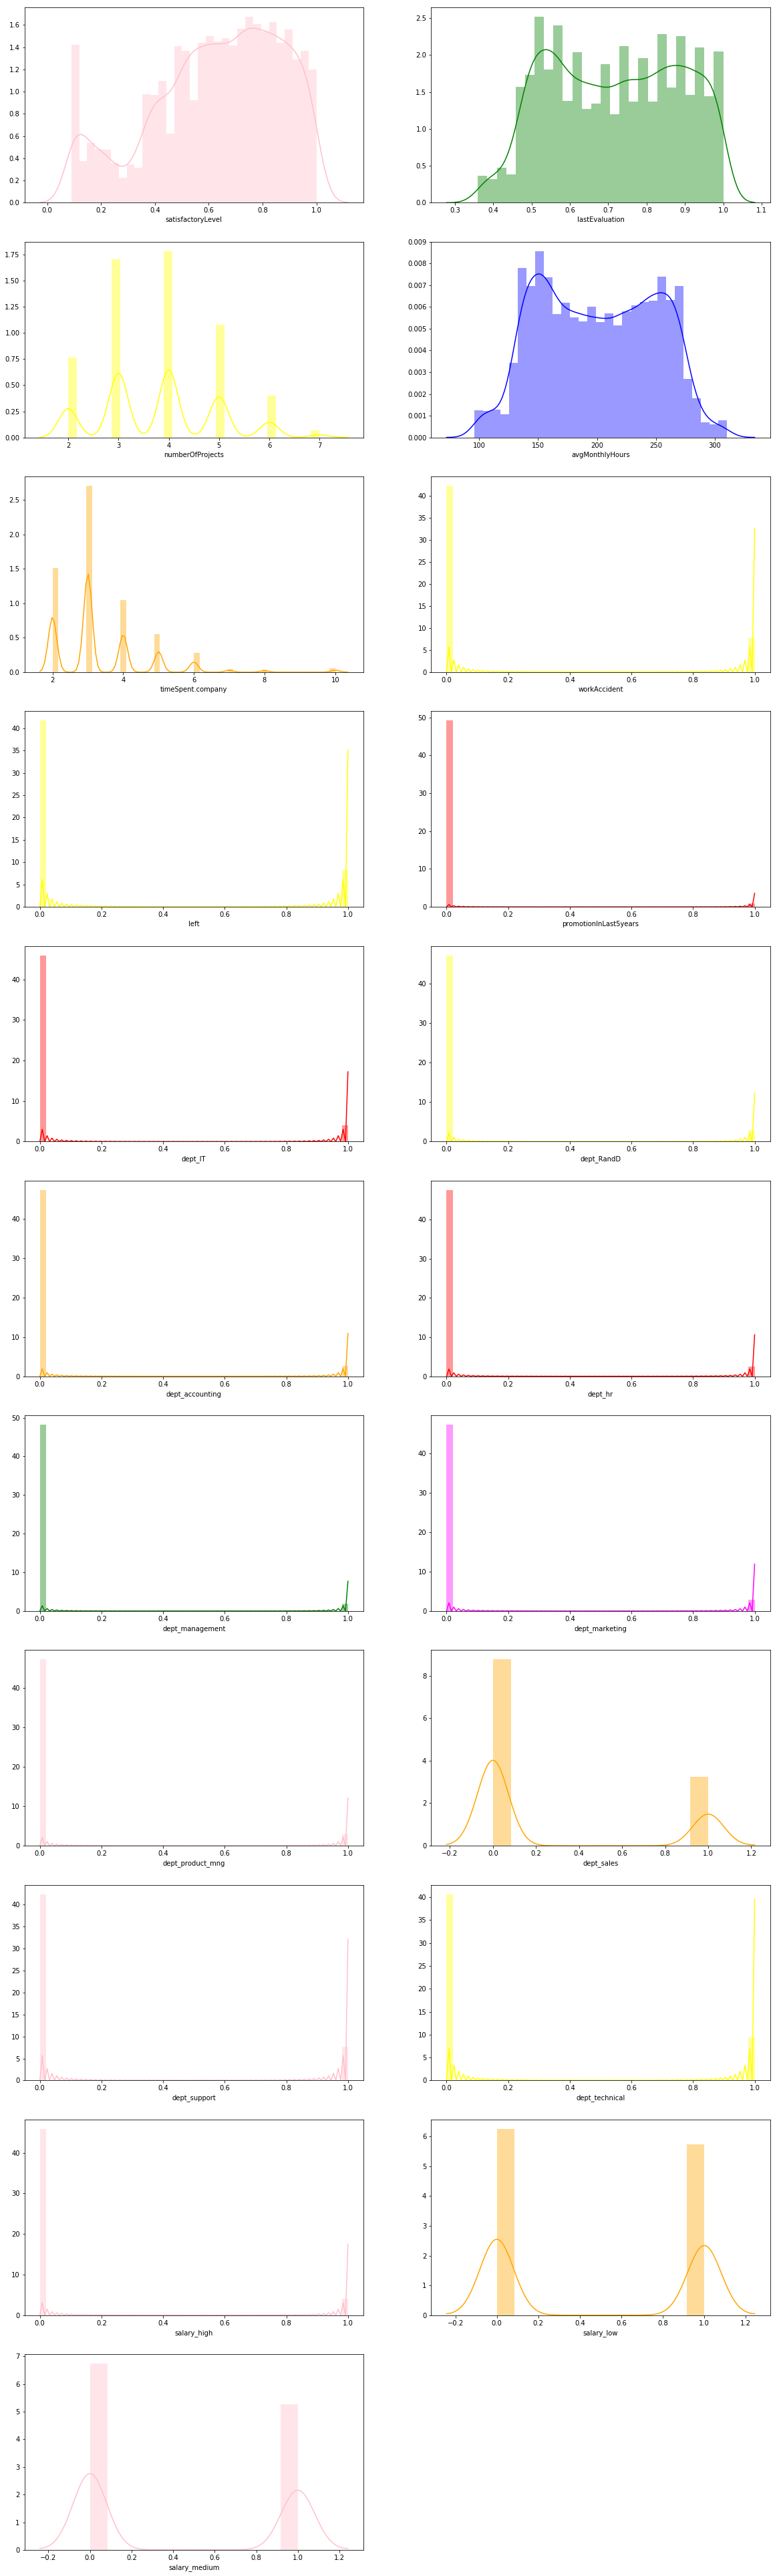

In [99]:
# Visualize the skewness of the data 

import random

cols=df.columns

#plt.figure(figsize=(17,40))
fig,ax=plt.subplots(11,2,figsize = (20,70))
fig.delaxes(ax[10][1]) # TO delete the extra one

i,j=0,0

colors=['red','blue','green','yellow','pink','skyblue','magenta','orange']

for col in cols:
    sns.distplot(df[col],kde=True,ax=ax[i,j],color=random.choice(colors))
    j+=1
    
    if(j==2):
        j=0
        i+=1
    


In [77]:
# Independent Features 

x=df.drop('left',axis=1)

# Dependent Features 

y=df['left']

## Normalization

In [100]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

x[x.columns]=scaler.fit_transform(x[x.columns])

In [101]:
x.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,promotionInLast5years,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,salary_high,salary_low,salary_medium
0,-1.035668,-1.108990,-1.549921,-0.892208,-0.274291,-0.427116,-0.131228,-0.297668,-0.247855,-0.233704,-0.229708,-0.194249,-0.24385,-0.246335,1.643797,-0.42315,-0.479817,-0.299986,1.043563,-0.884151
1,0.706637,0.851380,1.029194,1.262709,1.981036,-0.427116,-0.131228,-0.297668,-0.247855,-0.233704,-0.229708,-0.194249,-0.24385,-0.246335,1.643797,-0.42315,-0.479817,-0.299986,-0.958255,1.131028
2,-2.155721,0.970190,2.748604,1.467939,0.477485,-0.427116,-0.131228,-0.297668,-0.247855,-0.233704,-0.229708,-0.194249,-0.24385,-0.246335,1.643797,-0.42315,-0.479817,-0.299986,-0.958255,1.131028
3,-1.077151,-1.168396,-1.549921,-0.851162,-0.274291,-0.427116,-0.131228,-0.297668,-0.247855,-0.233704,-0.229708,-0.194249,-0.24385,-0.246335,1.643797,-0.42315,-0.479817,-0.299986,1.043563,-0.884151
4,-0.911218,-1.287206,-1.549921,-0.974300,-0.274291,-0.427116,-0.131228,-0.297668,-0.247855,-0.233704,-0.229708,-0.194249,-0.24385,-0.246335,1.643797,-0.42315,-0.479817,-0.299986,1.043563,-0.884151


#### Split the data into train and test

In [103]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=7)

# Logistic Regression

In [104]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()

In [105]:
# Train the model

lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [108]:
# Lets predict the test data 

lr_pred=lr.predict(x_test)

In [111]:
# Lets see how well logistic regression perfomed on the test data

lr_conf=confusion_matrix(y_test,lr_pred)

lr_conf

array([[1904,  100],
       [ 315,   80]], dtype=int64)

In [128]:
print("Precision = {0}".format(precision_score(y_test,lr_pred)))
print("Recall    = {0}".format(recall_score(y_test,lr_pred)))

Precision = 0.4444444444444444
Recall    = 0.20253164556962025


In [117]:
lr_y_scores=cross_val_predict(lr,x_train,y_train,cv=3,method="decision_function")

In [118]:
# Let's get our precision , recalls and threshold values 

precision,recall,threshold=precision_recall_curve(y_train,lr_y_scores)

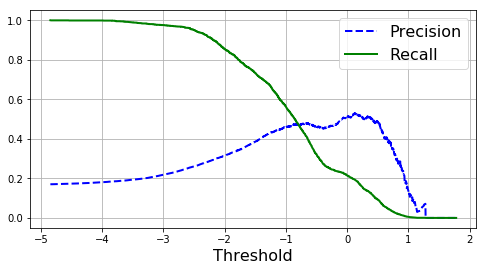

In [127]:
# Lets see how Threshold is reated to both Precision and Recall , this will help us to set threshold based on precision and rec

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="best", fontsize=16) 
    plt.xlabel("Threshold", fontsize=16)        
    plt.grid(True)                              
               


plt.figure(figsize=(8, 4))                                                                 
plot_precision_recall_vs_threshold(precision, recall, threshold)


Predict Probability Ouput Sample 
[[0.65596843 0.34403157]
 [0.98347813 0.01652187]
 [0.64549438 0.35450562]
 [0.46296511 0.53703489]
 [0.38326421 0.61673579]]
Positive Probabilities Samples
[0.34403157 0.01652187 0.35450562 0.53703489 0.61673579]
0.8276522903559969


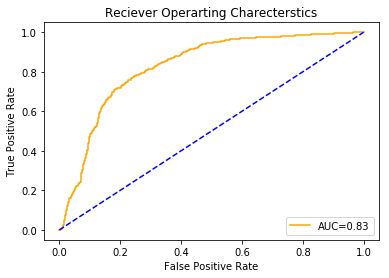

In [146]:
# ROC Curve 

probs=lr.predict_proba(x_test)

# It will give us both positive and negative in an array , lets print some samples so that you can see understand better
print("Predict Probability Ouput Sample ")
print(probs[0:5])

probs_positive=probs[:,1]  # Taking only probabilities of postivie class
print('Positive Probabilities Samples')
print(probs_positive[:5])


fpr,tpr,thresholds=metrics.roc_curve(y_test,probs_positive)

AUC=metrics.auc(fpr,tpr)

print(AUC)

plt.title("Reciever Operarting Charecterstics")
plt.plot(fpr,tpr,color='orange',label="AUC=%0.2f" % AUC)
plt.legend(loc='lower right')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0,1],[0,1],color='blue',linestyle='--')



# KNN 

In [148]:
from sklearn.neighbors import KNeighborsClassifier

kn=KNeighborsClassifier()

In [149]:
# Train the Model 

kn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [150]:
# Predict the test data 

kn_pred=kn.predict(x_test)

In [156]:
# Metrics 

kn_conf=confusion_matrix(y_test,kn_pred)

print("Confusion Matrix  = \n{0}".format(kn_conf))
print("Precision Score   = {0}".format(precision_score(y_test,kn_pred)))
print("Recall Score      = {0}".format(recall_score(y_test,kn_pred)))

Confusion Matrix  = 
[[1937   67]
 [  59  336]]
Precision Score   = 0.8337468982630273
Recall Score      = 0.850632911392405


##### Far better than Logistic Regression 

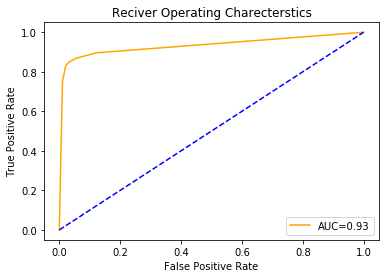

In [157]:
# ROC Curve 

kn_probs=kn.predict_proba(x_test)

kn_prob_pos=kn_probs[:,1]

fpr,tpr,thresholds=metrics.roc_curve(y_test,kn_prob_pos)

roc_auc=metrics.auc(fpr,tpr)

plt.title("Reciver Operating Charecterstics")
plt.plot(fpr,tpr,color='orange',label="AUC=%0.2f" % roc_auc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],color="blue",linestyle="--")

# Naive Bayes 

In [158]:
from sklearn.naive_bayes import GaussianNB

gnb=GaussianNB()

In [159]:
# Train the model

gnb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [161]:
# Predict the test data d

gnb_pred=gnb.predict(x_test)

In [162]:
# Metrics 

gnb_conf=confusion_matrix(y_test,gnb_pred)

print("Confusion Matrix  = \n{0}".format(gnb_conf))
print("Precision Score   = {0}".format(precision_score(y_test,gnb_pred)))
print("Recall Score      = {0}".format(recall_score(y_test,gnb_pred)))

Confusion Matrix  = 
[[1539  465]
 [  94  301]]
Precision Score   = 0.39295039164490864
Recall Score      = 0.7620253164556962


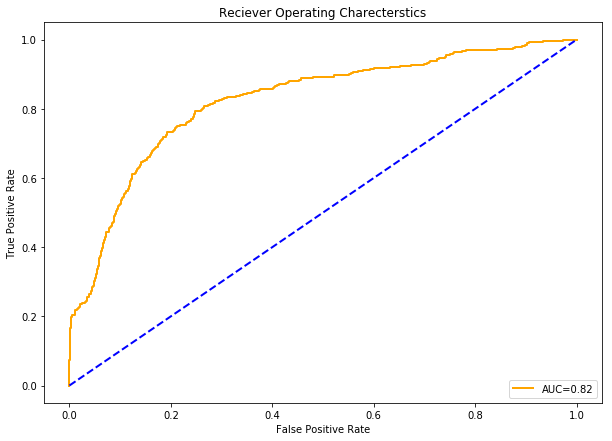

In [169]:
# ROC Curve 

probs=gnb.predict_proba(x_test)

probs_pos=probs[:,1]

fpr,tpr,thresholds=metrics.roc_curve(y_test,probs_pos)

AUC=metrics.auc(fpr,tpr)

plt.figure(figsize=(10,7))

plt.title("Reciever Operating Charecterstics")
plt.plot(fpr,tpr,color='orange',label="AUC=%0.2f" %AUC,linewidth=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'b--',linewidth=2)
plt.show()

In [178]:
def roc_plot(prob_pos):
    fpr,tpr,thresholds=metrics.roc_curve(y_test,prob_pos)

    AUC=metrics.auc(fpr,tpr)

    plt.figure(figsize=(10,7))

    plt.title("Reciever Operating Charecterstics")
    plt.plot(fpr,tpr,color='orange',label="AUC=%0.2f" %AUC,linewidth=2)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'b--',linewidth=2)
    plt.show()


# Decision Tree

In [171]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()

In [172]:
# Train the Model without any hyperparameter tuning 

dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [173]:
# Predict the output 

dt_pred=dt.predict(x_test)

In [174]:
# Metrics 

dt_conf=confusion_matrix(y_test,dt_pred)

print("Confusion Matrix  = \n{0}".format(dt_conf))
print("Precision Score   = {0}".format(precision_score(y_test,dt_pred)))
print("Recall Score      = {0}".format(recall_score(y_test,dt_pred)))

Confusion Matrix  = 
[[1964   40]
 [  47  348]]
Precision Score   = 0.8969072164948454
Recall Score      = 0.8810126582278481


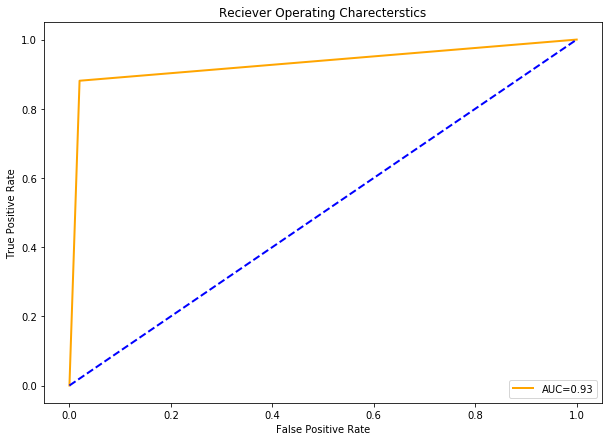

In [179]:
# ROC before tuning 

dt_prob=dt.predict_proba(x_test)[:,1]

roc_plot(dt_prob)

In [180]:
dtr_params = dict(max_depth=[3,5,6,7,8,10,11,12,13,14,15,17,None], max_features=["sqrt","log2","auto",None],
                  max_leaf_nodes=[None, 10,20,30,40,50,60,70,80,90,100],
                  min_weight_fraction_leaf = [0.0,0.1,0.5,0.2,0.25,0.3,0.35,0.4,0.5],
                  criterion:['gini','entropy']
                  splitter=['best', "random"],min_samples_leaf=[1,2,3,4,5] )

In [182]:
dt_rand=GridSearchCV(dt,dtr_params,cv=5,verbose=1)

dt_rand.fit(x_train,y_train)

Fitting 5 folds for each of 27720 candidates, totalling 138600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 138600 out of 138600 | elapsed: 14.8min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='de...
             param_grid={'max_depth': [3, 5, 8, 10, 15, 17, None],
                         'max_f

In [183]:
# Let's see our best params

dt_rand.best_params_

{'max_depth': 8,
 'max_features': None,
 'max_leaf_nodes': 20,
 'min_samples_leaf': 2,
 'min_weight_fraction_leaf': 0.0,
 'splitter': 'best'}

In [184]:
# Let's see the best score

dt_rand.best_score_

0.9854046658164526

In [186]:
# Let's see how accuratly it predicts on test data 


dt_pred=dt_rand.predict(x_test)

In [187]:
# Metrics 

dt_conf=confusion_matrix(y_test,dt_pred)

print("Confusion Matrix  = \n{0}".format(dt_conf))
print("Precision Score   = {0}".format(precision_score(y_test,dt_pred)))
print("Recall Score      = {0}".format(recall_score(y_test,dt_pred)))

Confusion Matrix  = 
[[2002    2]
 [  45  350]]
Precision Score   = 0.9943181818181818
Recall Score      = 0.8860759493670886


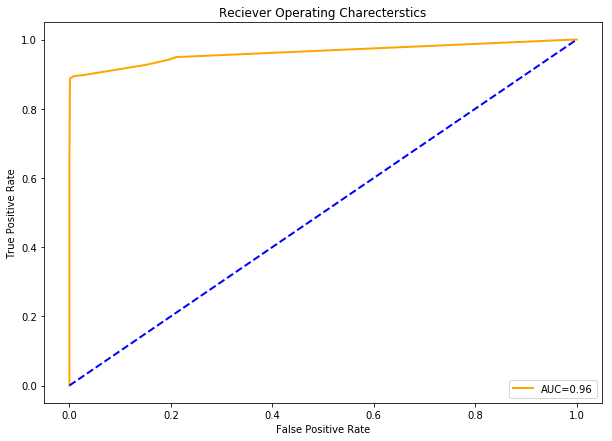

In [189]:
# ROC after tuning 

dt_prob=dt_rand.predict_proba(x_test)[:,1]

roc_plot(dt_prob)

In [190]:

from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

# AdaBoost Classifier